In [73]:
import json

datastore = []
file_path = "/Users/kamakshiojha/Documents/Machine_Learning_projects/Sarcasm_detection/Dataset/Sarcasm_Headlines_Dataset.json"

with open(file_path, 'r') as f:
    for line in f:
        datastore.append(json.loads(line))

print(datastore[:5])


[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}, {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365', 'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse", 'is_sarcastic': 0}, {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697', 'headline': "mom starting to fear son's web series closest thing she will have to grandchild", 'is_sarcastic': 1}, {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302', 'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'is_sarcastic': 1}, {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-bi

In [74]:
sentences = [] 
labels = []


for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Preprocessing the headlines

In [75]:
vocab_size = 1000
embedding_dim = 16
max_length = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [76]:
# from sklearn.model_selection import train_test_split

# test_size = 0.2 
# train_data, test_data = train_test_split(datastore, test_size=test_size)

In [77]:
import numpy as np

training_sentence = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentence = sentences[training_size:]
testing_labels = labels[training_size:]


# for s, l in train_data:
#     training_sentence.append(item['headline'])
#     training_labels.append(item['is_sarcastic'])


# for s, l in test_data:
#     testing_sentence.append(item['headline'])
#     testing_labels.append(item['is_sarcastic'])



In [78]:

# training_labels_final = np.array(training_labels)

# testing_labels_final = np.array(testing_labels)

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [80]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

tokenizer.fit_on_texts(training_sentence)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentence)
training_padded = pad_sequences(training_sequences, maxlen = max_length ,truncating = trunc_type, padding = padding_type)


testing_sequences = tokenizer.texts_to_sequences(testing_sentence)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length ,truncating = trunc_type, padding = padding_type)


## MODEL - 1

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 16)            16000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16433 (64.19 KB)
Trainable params: 16433 (64.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [87]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [88]:
print(training_padded.shape)
print(testing_padded.shape)
print(training_labels.shape)
print(testing_labels.shape)


(20000, 16)
(6709, 16)
(20000,)
(6709,)


In [16]:

num_epochs = 30
history = model.fit(
    training_padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_labels), verbose = 2
)



Epoch 1/30
625/625 - 1s - loss: 0.5146 - accuracy: 0.7456 - val_loss: 0.4091 - val_accuracy: 0.8125 - 530ms/epoch - 848us/step
Epoch 2/30
625/625 - 0s - loss: 0.3780 - accuracy: 0.8273 - val_loss: 0.3979 - val_accuracy: 0.8126 - 301ms/epoch - 481us/step
Epoch 3/30
625/625 - 0s - loss: 0.3637 - accuracy: 0.8349 - val_loss: 0.4002 - val_accuracy: 0.8120 - 295ms/epoch - 472us/step
Epoch 4/30
625/625 - 0s - loss: 0.3580 - accuracy: 0.8368 - val_loss: 0.4023 - val_accuracy: 0.8144 - 298ms/epoch - 477us/step
Epoch 5/30
625/625 - 0s - loss: 0.3559 - accuracy: 0.8377 - val_loss: 0.4111 - val_accuracy: 0.8134 - 292ms/epoch - 467us/step
Epoch 6/30
625/625 - 0s - loss: 0.3538 - accuracy: 0.8390 - val_loss: 0.4050 - val_accuracy: 0.8113 - 301ms/epoch - 482us/step
Epoch 7/30
625/625 - 0s - loss: 0.3530 - accuracy: 0.8403 - val_loss: 0.4079 - val_accuracy: 0.8068 - 295ms/epoch - 472us/step
Epoch 8/30
625/625 - 0s - loss: 0.3523 - accuracy: 0.8393 - val_loss: 0.4055 - val_accuracy: 0.8111 - 303ms/epo

In [17]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights)

[[-0.02345393  0.03249176  0.09768865 ...  0.03078942  0.04127204
  -0.05003984]
 [ 0.05385347  0.01877232  0.01172093 ... -0.01972506 -0.0136133
   0.04654089]
 [ 0.07301988 -0.00910746  0.07143826 ... -0.00486795  0.03165933
   0.06001008]
 ...
 [-0.55290204  0.48539662 -0.2857702  ...  0.43938288 -0.4510671
  -0.58664984]
 [ 0.00218982 -0.03875472  0.06393977 ... -0.01953188  0.07353958
  -0.0714154 ]
 [ 0.03452809  0.00752764  0.07231584 ...  0.04019015  0.00377178
  -0.05106545]]


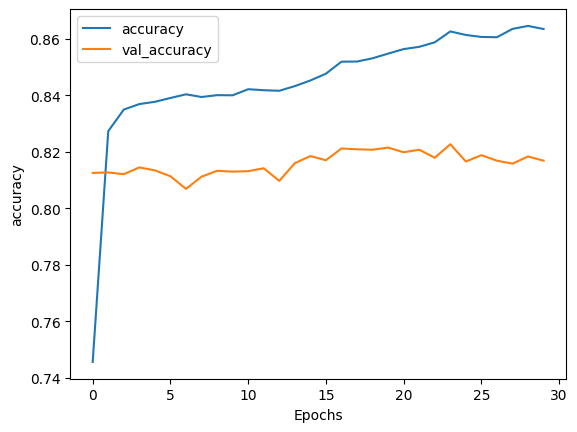

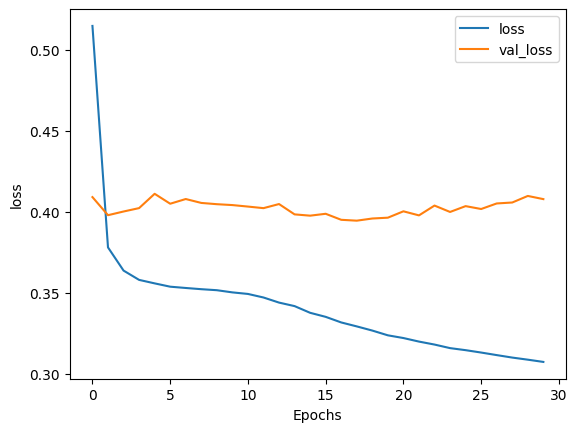

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show() 

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## MODEL - 2 

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 175489 (685.50 KB)
Trainable params: 175

In [21]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [22]:
print(training_padded.shape)
print(testing_padded.shape)
print(training_labels.shape)
print(testing_labels.shape)


(20000, 16)
(6709, 16)
(20000,)
(6709,)


In [23]:

num_epochs = 30
history = model.fit(
    training_padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_labels), verbose = 2
)



Epoch 1/30
625/625 - 6s - loss: 0.4316 - accuracy: 0.7914 - val_loss: 0.3893 - val_accuracy: 0.8216 - 6s/epoch - 10ms/step
Epoch 2/30
625/625 - 4s - loss: 0.3448 - accuracy: 0.8446 - val_loss: 0.3678 - val_accuracy: 0.8359 - 4s/epoch - 7ms/step
Epoch 3/30
625/625 - 4s - loss: 0.3145 - accuracy: 0.8616 - val_loss: 0.3659 - val_accuracy: 0.8357 - 4s/epoch - 7ms/step
Epoch 4/30
625/625 - 4s - loss: 0.2976 - accuracy: 0.8686 - val_loss: 0.3675 - val_accuracy: 0.8329 - 4s/epoch - 7ms/step
Epoch 5/30
625/625 - 4s - loss: 0.2843 - accuracy: 0.8765 - val_loss: 0.3698 - val_accuracy: 0.8328 - 4s/epoch - 7ms/step
Epoch 6/30
625/625 - 4s - loss: 0.2714 - accuracy: 0.8820 - val_loss: 0.3838 - val_accuracy: 0.8290 - 4s/epoch - 7ms/step
Epoch 7/30
625/625 - 4s - loss: 0.2557 - accuracy: 0.8873 - val_loss: 0.3864 - val_accuracy: 0.8299 - 4s/epoch - 7ms/step
Epoch 8/30
625/625 - 4s - loss: 0.2444 - accuracy: 0.8935 - val_loss: 0.4133 - val_accuracy: 0.8250 - 4s/epoch - 7ms/step
Epoch 9/30
625/625 - 4s

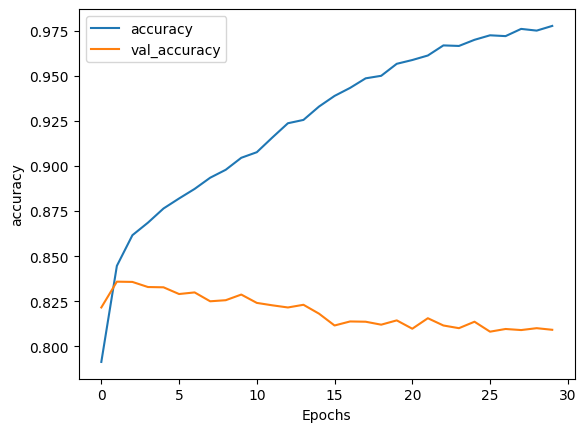

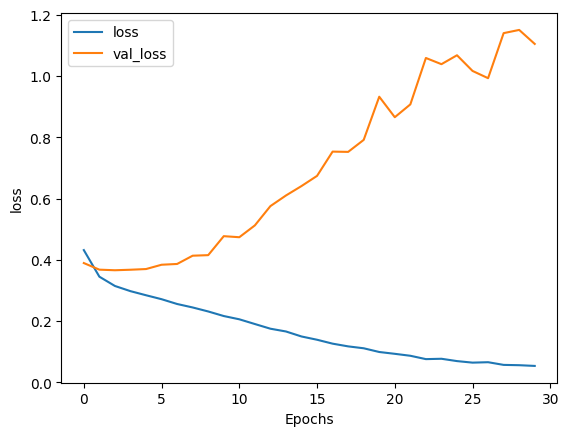

In [24]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show() 

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## MODEL - 3

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 16, 16)            16000     
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 24)                1560      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 30129 (117.69 KB)
Trainable params: 30129 (117.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [28]:

num_epochs = 50
history = model.fit(
    training_padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_labels), verbose = 2
)



Epoch 1/50
625/625 - 3s - loss: 0.4486 - accuracy: 0.7739 - val_loss: 0.3850 - val_accuracy: 0.8214 - 3s/epoch - 4ms/step
Epoch 2/50
625/625 - 1s - loss: 0.3596 - accuracy: 0.8356 - val_loss: 0.3841 - val_accuracy: 0.8207 - 1s/epoch - 2ms/step
Epoch 3/50
625/625 - 1s - loss: 0.3372 - accuracy: 0.8464 - val_loss: 0.3688 - val_accuracy: 0.8348 - 1s/epoch - 2ms/step
Epoch 4/50
625/625 - 1s - loss: 0.3186 - accuracy: 0.8567 - val_loss: 0.3815 - val_accuracy: 0.8310 - 1s/epoch - 2ms/step
Epoch 5/50
625/625 - 1s - loss: 0.3023 - accuracy: 0.8676 - val_loss: 0.3792 - val_accuracy: 0.8307 - 1s/epoch - 2ms/step
Epoch 6/50
625/625 - 1s - loss: 0.2914 - accuracy: 0.8737 - val_loss: 0.3786 - val_accuracy: 0.8281 - 1s/epoch - 2ms/step
Epoch 7/50
625/625 - 1s - loss: 0.2845 - accuracy: 0.8783 - val_loss: 0.3973 - val_accuracy: 0.8252 - 1s/epoch - 2ms/step
Epoch 8/50
625/625 - 1s - loss: 0.2748 - accuracy: 0.8817 - val_loss: 0.3829 - val_accuracy: 0.8281 - 1s/epoch - 2ms/step
Epoch 9/50
625/625 - 1s 

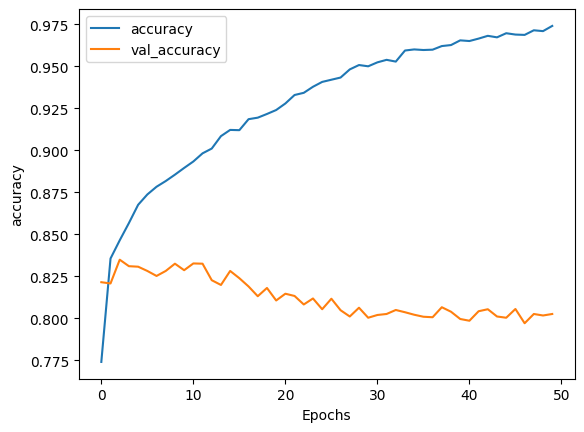

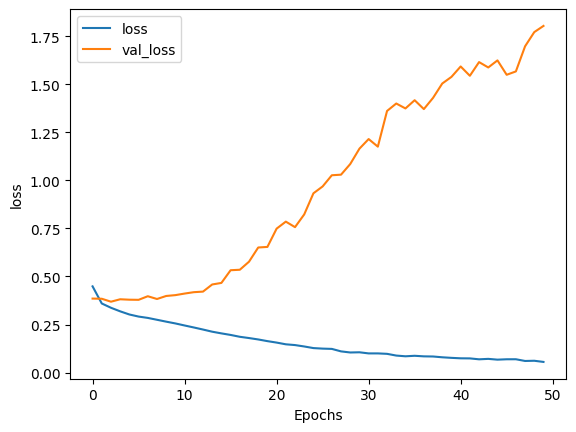

In [29]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show() 

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## MODEL - 4

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Conv1D(128, 5, activation = 'relu'),
    tf.keras.layers.Conv1D(64, 5, activation = 'relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [31]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [32]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
num_epochs = 50
history = model.fit(
    training_padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_labels), verbose = 2
)



Epoch 1/50
625/625 - 3s - loss: 0.4474 - accuracy: 0.7750 - val_loss: 0.3956 - val_accuracy: 0.8198 - 3s/epoch - 5ms/step
Epoch 2/50
625/625 - 2s - loss: 0.3340 - accuracy: 0.8492 - val_loss: 0.3681 - val_accuracy: 0.8325 - 2s/epoch - 3ms/step
Epoch 3/50
625/625 - 2s - loss: 0.2962 - accuracy: 0.8700 - val_loss: 0.3825 - val_accuracy: 0.8307 - 2s/epoch - 3ms/step
Epoch 4/50
625/625 - 2s - loss: 0.2640 - accuracy: 0.8856 - val_loss: 0.4177 - val_accuracy: 0.8265 - 2s/epoch - 3ms/step
Epoch 5/50
625/625 - 2s - loss: 0.2359 - accuracy: 0.8992 - val_loss: 0.4115 - val_accuracy: 0.8264 - 2s/epoch - 3ms/step
Epoch 6/50
625/625 - 2s - loss: 0.2044 - accuracy: 0.9143 - val_loss: 0.4780 - val_accuracy: 0.8235 - 2s/epoch - 3ms/step
Epoch 7/50
625/625 - 2s - loss: 0.1784 - accuracy: 0.9270 - val_loss: 0.5018 - val_accuracy: 0.8153 - 2s/epoch - 3ms/step
Epoch 8/50
625/625 - 2s - loss: 0.1517 - accuracy: 0.9395 - val_loss: 0.5720 - val_accuracy: 0.8141 - 2s/epoch - 3ms/step
Epoch 9/50
625/625 - 2s 

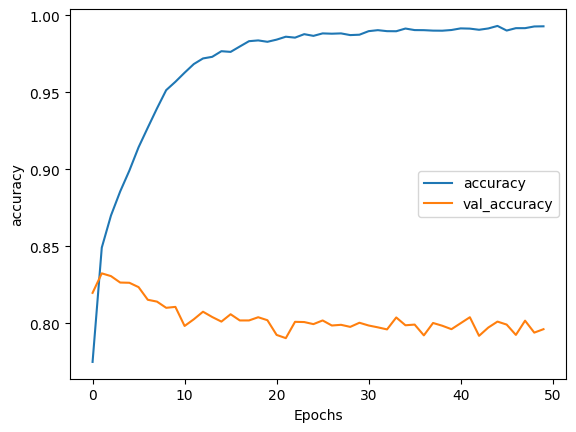

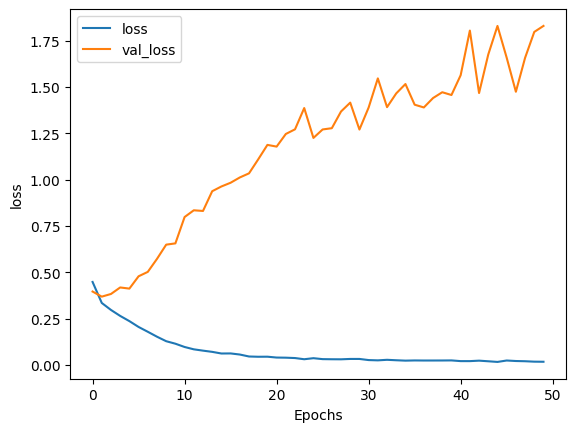

In [33]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show() 

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## PREDICTION

In [39]:
def preprocess_input_headline(headline, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([headline])
    padded = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded

input_headline = "former versace store clerk sues over secret 'black code' for minority shoppers"

preprocessed_headline = preprocess_input_headline(input_headline, tokenizer, max_length)

dummy_prediction = np.array([[0.8]]) 

print(f"Prediction: {dummy_prediction[0][0]}")
threshold = 0.5
is_sarcastic = dummy_prediction[0][0] > threshold
print(f"Is sarcastic: {is_sarcastic}")

Prediction: 0.8
Is sarcastic: True


## MODEL - 5

In [89]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(256, 5, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [90]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [91]:

num_epochs = 50
history = model.fit(
    training_padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_labels), verbose = 2
)



Epoch 1/50
625/625 - 4s - loss: 0.4874 - accuracy: 0.7555 - val_loss: 0.4211 - val_accuracy: 0.7889 - 4s/epoch - 7ms/step
Epoch 2/50
625/625 - 3s - loss: 0.3571 - accuracy: 0.8384 - val_loss: 0.3962 - val_accuracy: 0.8219 - 3s/epoch - 5ms/step
Epoch 3/50
625/625 - 5s - loss: 0.3127 - accuracy: 0.8633 - val_loss: 0.4136 - val_accuracy: 0.8173 - 5s/epoch - 8ms/step
Epoch 4/50
625/625 - 3s - loss: 0.2748 - accuracy: 0.8811 - val_loss: 0.4610 - val_accuracy: 0.7979 - 3s/epoch - 4ms/step
Epoch 5/50
625/625 - 3s - loss: 0.2405 - accuracy: 0.8964 - val_loss: 0.4385 - val_accuracy: 0.8155 - 3s/epoch - 4ms/step
Epoch 6/50
625/625 - 3s - loss: 0.2080 - accuracy: 0.9129 - val_loss: 0.5087 - val_accuracy: 0.8058 - 3s/epoch - 5ms/step
Epoch 7/50
625/625 - 3s - loss: 0.1727 - accuracy: 0.9305 - val_loss: 0.5218 - val_accuracy: 0.7973 - 3s/epoch - 4ms/step
Epoch 8/50
625/625 - 3s - loss: 0.1530 - accuracy: 0.9372 - val_loss: 0.5491 - val_accuracy: 0.8116 - 3s/epoch - 4ms/step
Epoch 9/50
625/625 - 3s 

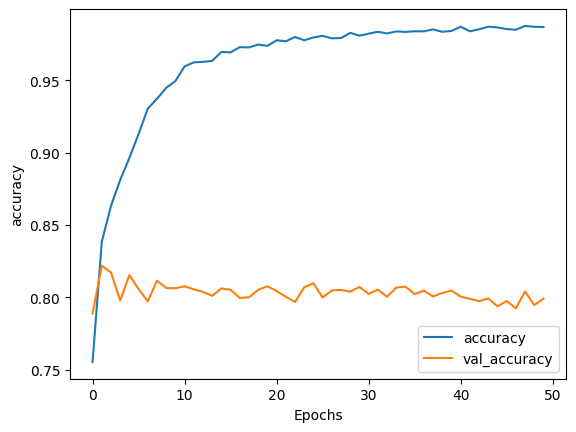

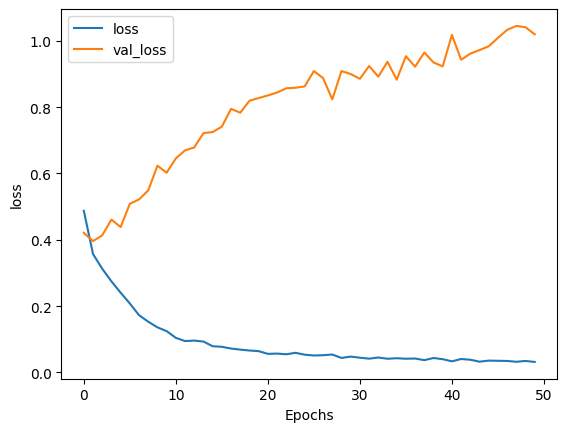

In [92]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show() 

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [93]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [94]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [95]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
num_epochs = 50
history = model.fit(
    training_padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_labels), verbose = 2
)



Epoch 1/50
625/625 - 8s - loss: 0.4487 - accuracy: 0.7743 - val_loss: 0.3915 - val_accuracy: 0.8214 - 8s/epoch - 12ms/step
Epoch 2/50
625/625 - 4s - loss: 0.3498 - accuracy: 0.8442 - val_loss: 0.3653 - val_accuracy: 0.8347 - 4s/epoch - 6ms/step
Epoch 3/50
625/625 - 4s - loss: 0.3224 - accuracy: 0.8586 - val_loss: 0.3773 - val_accuracy: 0.8247 - 4s/epoch - 6ms/step
Epoch 4/50
625/625 - 4s - loss: 0.3073 - accuracy: 0.8657 - val_loss: 0.3634 - val_accuracy: 0.8359 - 4s/epoch - 6ms/step
Epoch 5/50
625/625 - 4s - loss: 0.2949 - accuracy: 0.8705 - val_loss: 0.3658 - val_accuracy: 0.8307 - 4s/epoch - 6ms/step
Epoch 6/50
625/625 - 4s - loss: 0.2828 - accuracy: 0.8779 - val_loss: 0.3728 - val_accuracy: 0.8277 - 4s/epoch - 6ms/step
Epoch 7/50
625/625 - 4s - loss: 0.2689 - accuracy: 0.8838 - val_loss: 0.3988 - val_accuracy: 0.8253 - 4s/epoch - 6ms/step
Epoch 8/50
625/625 - 4s - loss: 0.2648 - accuracy: 0.8856 - val_loss: 0.3941 - val_accuracy: 0.8307 - 4s/epoch - 6ms/step
Epoch 9/50
625/625 - 4s

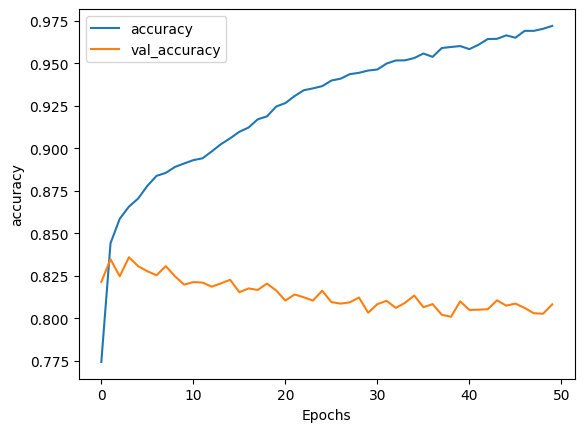

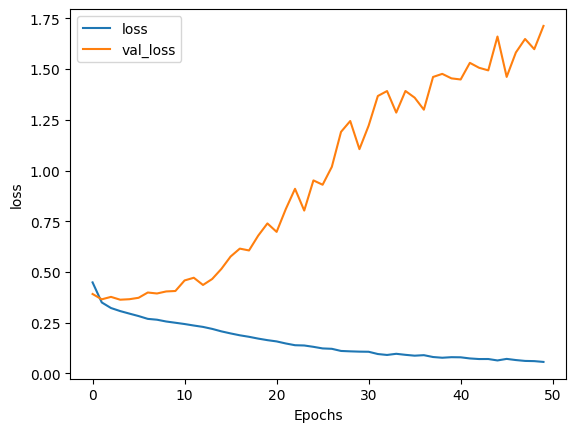

In [96]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show() 

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## MODEL - 7

In [97]:
import tensorflow as tf

class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], 1), initializer='random_normal')
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[1], 1), initializer='zeros')
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a = tf.nn.softmax(e, axis=1)
        output = tf.reduce_sum(x * a, axis=1)
        return output

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    Attention(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [98]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [99]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
num_epochs = 50
history = model.fit(
    training_padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_labels), verbose = 2
)



Epoch 1/50
625/625 - 4s - loss: 0.4507 - accuracy: 0.7730 - val_loss: 0.3960 - val_accuracy: 0.8131 - 4s/epoch - 6ms/step
Epoch 2/50
625/625 - 2s - loss: 0.3666 - accuracy: 0.8325 - val_loss: 0.3876 - val_accuracy: 0.8243 - 2s/epoch - 4ms/step
Epoch 3/50
625/625 - 2s - loss: 0.3539 - accuracy: 0.8392 - val_loss: 0.3882 - val_accuracy: 0.8238 - 2s/epoch - 4ms/step
Epoch 4/50
625/625 - 2s - loss: 0.3449 - accuracy: 0.8445 - val_loss: 0.3975 - val_accuracy: 0.8252 - 2s/epoch - 4ms/step
Epoch 5/50
625/625 - 2s - loss: 0.3350 - accuracy: 0.8494 - val_loss: 0.3930 - val_accuracy: 0.8235 - 2s/epoch - 4ms/step
Epoch 6/50
625/625 - 3s - loss: 0.3307 - accuracy: 0.8500 - val_loss: 0.3955 - val_accuracy: 0.8201 - 3s/epoch - 4ms/step
Epoch 7/50
625/625 - 3s - loss: 0.3223 - accuracy: 0.8554 - val_loss: 0.3840 - val_accuracy: 0.8252 - 3s/epoch - 4ms/step
Epoch 8/50
625/625 - 3s - loss: 0.3138 - accuracy: 0.8598 - val_loss: 0.3905 - val_accuracy: 0.8301 - 3s/epoch - 4ms/step
Epoch 9/50
625/625 - 3s 

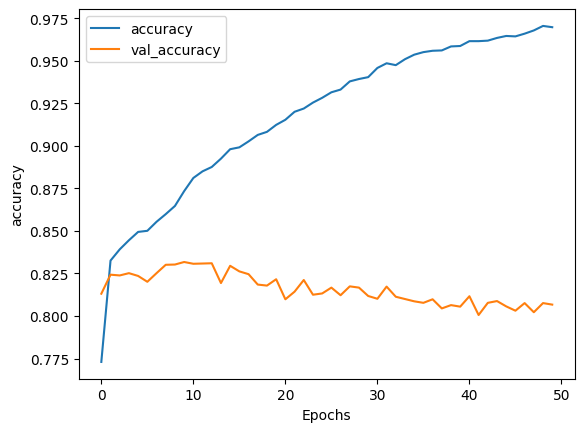

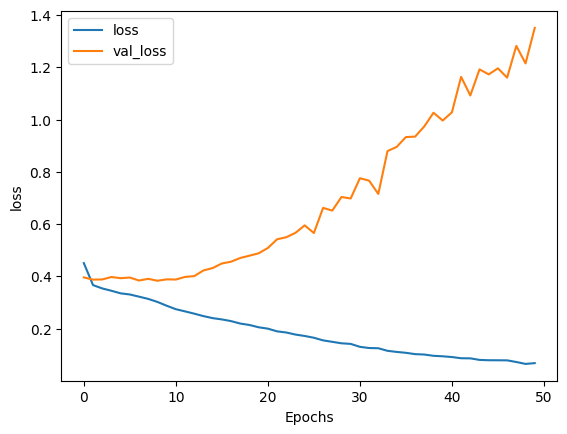

In [100]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show() 

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [108]:

def preprocess_input_headline(headline, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([headline])
    padded = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded


input_headline = "former versace store clerk sues over secret 'black code' for minority shoppers"

preprocessed_headline = preprocess_input_headline(input_headline, tokenizer, max_length)


threshold = 0.5 
predictions = model.predict(preprocessed_headline)
is_sarcastic = predictions[0][0] > threshold

print(f"Raw prediction value: {predictions[0][0]}")
print(f"Is sarcastic: {is_sarcastic}")


1/1 [==============================] - 0s 25ms/step
Raw prediction value: 0.03394157439470291
Is sarcastic: False


In [111]:

def preprocess_input_headline(headline, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([headline])
    padded = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded


input_headline = "boehner just wants wife to listen, not come up with alternative debt-reduction ideas"

preprocessed_headline = preprocess_input_headline(input_headline, tokenizer, max_length)


threshold = 0.5 
predictions = model.predict(preprocessed_headline)
is_sarcastic = predictions[0][0] > threshold

print(f"Raw prediction value: {predictions[0][0]}")
print(f"Is sarcastic: {is_sarcastic}")


1/1 [==============================] - 0s 12ms/step
Raw prediction value: 0.9999998211860657
Is sarcastic: True


In [112]:

def preprocess_input_headline(headline, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([headline])
    padded = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded


input_headline = "Study finds surprising correlation between intelligence and ability to appreciate 'The Room'"

preprocessed_headline = preprocess_input_headline(input_headline, tokenizer, max_length)


threshold = 0.5 
predictions = model.predict(preprocessed_headline)
is_sarcastic = predictions[0][0] > threshold

print(f"Raw prediction value: {predictions[0][0]}")
print(f"Is sarcastic: {is_sarcastic}")



1/1 [==============================] - 0s 17ms/step
Raw prediction value: 0.9999979734420776
Is sarcastic: True
